# HUMAN ACTIVITY RECOGNITION
# Using Smartphones
--------------------------------------------------------
---------------------------

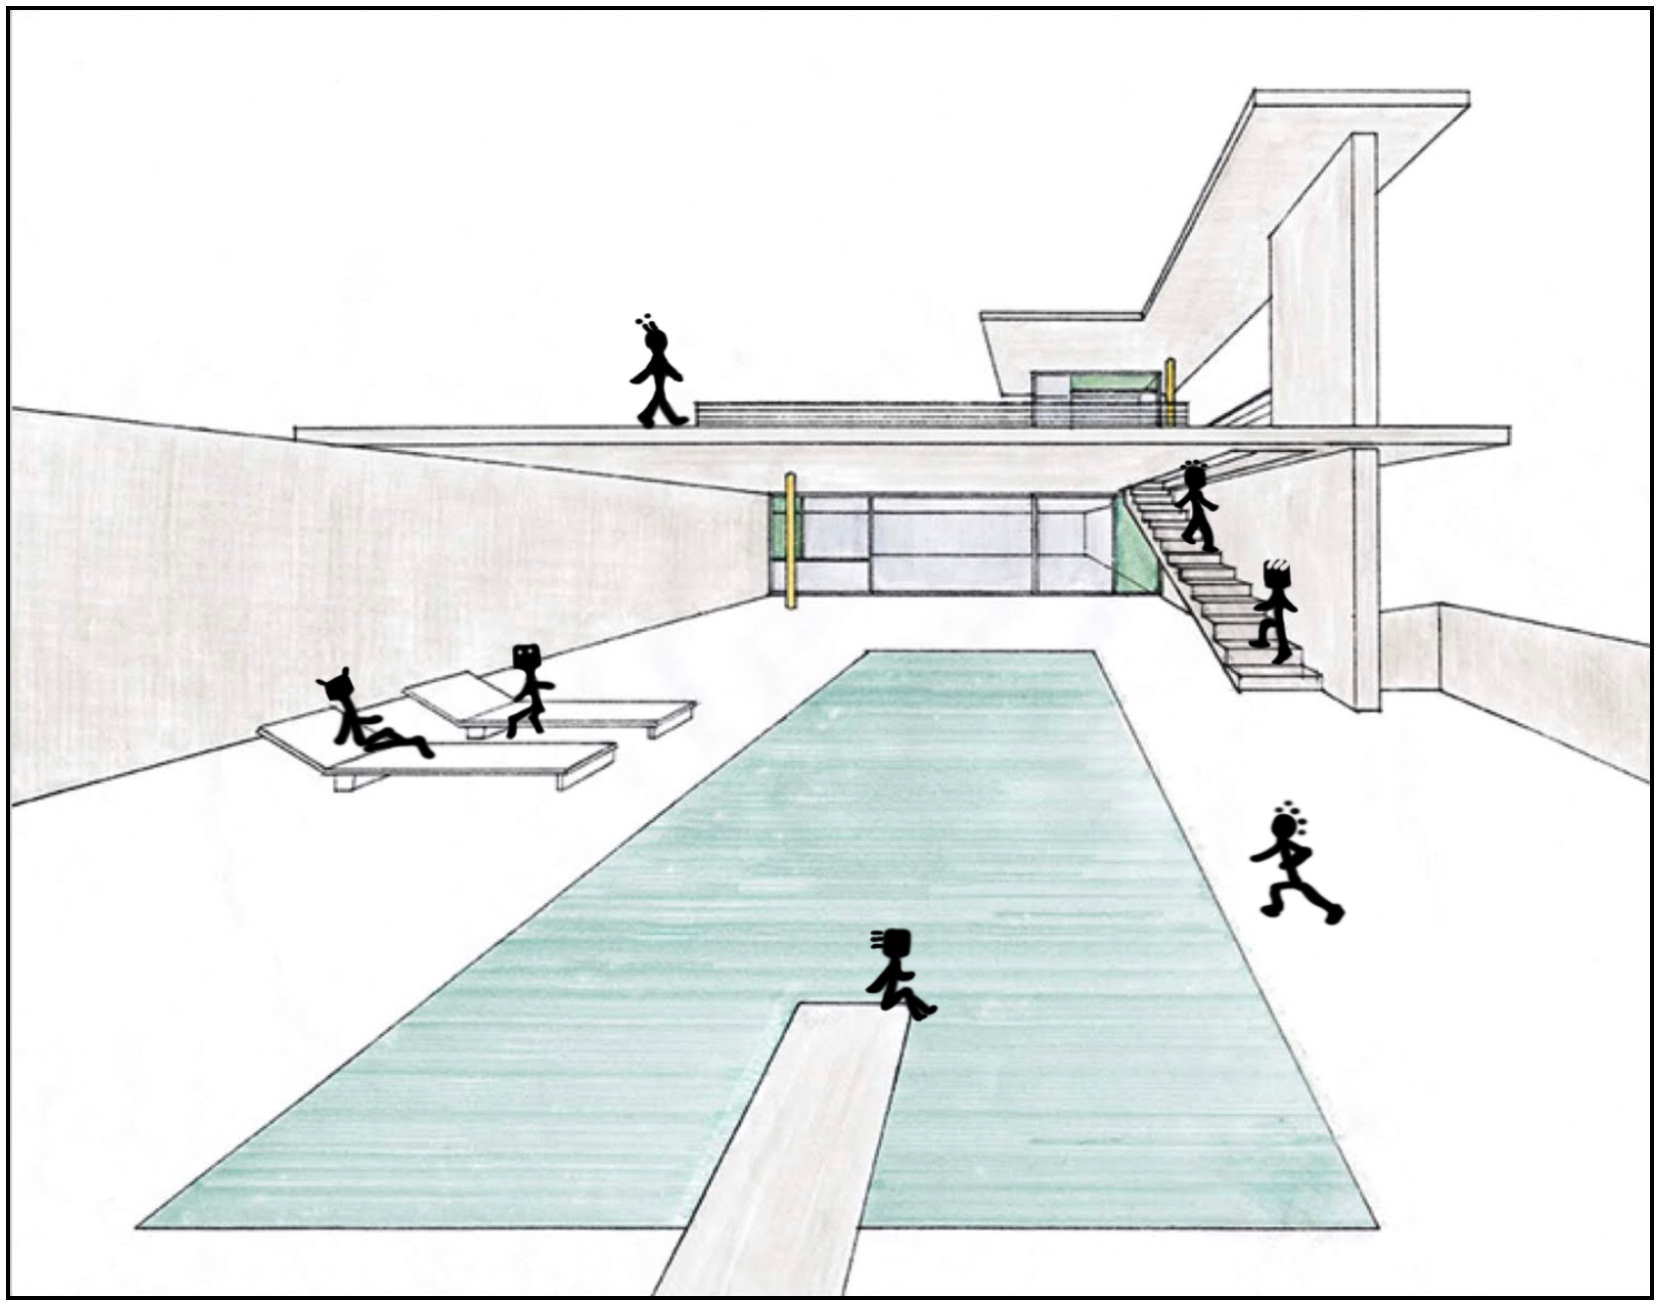
Source - https://medium.com/@xiaoshansun/human-activity-recognition-using-smartphones-sensor-data-fd1af142cc81

- Human Activity Recognition, or HAR for short, is the problem of predicting what a person is doing based on a trace of their movement using sensors.
- The project is to build a model that predicts the human activities such as walking, walking upstairs, walking downstairs, sitting, standing or laying.
- The dataset we will work on is collected from 30 persons(referred as subjects in the dataset), performing differengt activities with a smartphone to their waists.
- The data is recorded with the help of sensors (accelerometer and Gyroscope) present in the smartphone.
- This experiment was video recorded to label the data manually.

# How data was recorded ?
- By using sensors
        - Gyroscope
        - Accelerometer
- Collected by using sensors which pfresent in smartphone

- They have captured '3-axial linear acceleration'(tAcc-XYZ) from accelerometer and '3-axial angular velocity' (tGyro-XYZ) from Gyroscope with several variations.
        - Prefix t in the feature denotes time
        - Suffix 'XYZ' represnts 2 axial signals in X, Y and Z directions

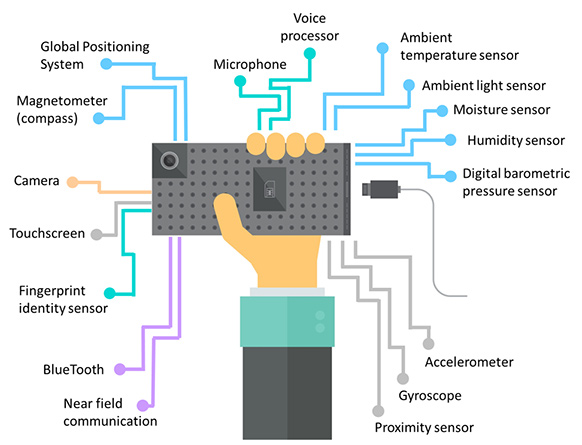

# Feature Names
- These sensor signals are preprocessed by applying noise filters and then sampled in fixed width sliding windows of 2.56 seconds each with 50% overlap.
- Each window has 128 readings
- From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
- In our dataset, each datapoint represents a window with different readings
- The accelertion signal was saperated into Body and Gravity acceleration signals(tBodyAcc-XYZ and tGravityAcc-XYZ) using some low pass filter with corner frequecy of 0.3Hz.
- After that, the body linear acceleration and angular velocity were derived in time to obtian jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ).
- The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag and tBodyGyroJerkMag.
- Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with prefix 'f' just like original signals with prefix 't'. These signals are labeled as fBodyAcc-XYZ, fBodyGyroMag etc.,.
- These are the signals that we got so far.
    - tBodyAcc-XYZ
    - tGravityAcc-XYZ
    - tBodyAccJerk-XYZ
    - tBodyGyro-XYZ
    - tBodyGyroJerk-XYZ
    - tBodyAccMag
    - tGravityAccMag
    - tBodyAccJerkMag
    - tBodyGyroMag
    - tBodyGyroJerkMag
    - fBodyAcc-XYZ
    - fBodyAccJerk-XYZ
    - fBodyGyro-XYZ
    - fBodyAccMag
    - fBodyAccJerkMag
    - fBodyGyroMag
    - fBodyGyroJerkMag

- We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

    - mean(): Mean value
    - std(): Standard deviation
    - mad(): Median absolute deviation
    - max(): Largest value in array
    - min(): Smallest value in array
    - sma(): Signal magnitude area
    - energy(): Energy measure. Sum of the squares divided by the number of values.
    - iqr(): Interquartile range
    - entropy(): Signal entropy
    - arCoeff(): Autorregresion coefficients with Burg order equal to 4
    - correlation(): correlation coefficient between two signals
    - maxInds(): index of the frequency component with largest magnitude
    - meanFreq(): Weighted average of the frequency components to obtain a mean frequency
    - skewness(): skewness of the frequency domain signal
    - kurtosis(): kurtosis of the frequency domain signal
    - bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.
    - angle(): Angle between to vectors.

- We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable' `

    - gravityMean
    - tBodyAccMean
    - tBodyAccJerkMean
    - tBodyGyroMean
    - tBodyGyroJerkMean


# y_Labels(Encoded)
In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

    - WALKING as 1
    - WALKING_UPSTAIRS as 2
    - WALKING_DOWNSTAIRS as 3
    - SITTING as 4
    - STANDING as 5
    - LAYING as 6

# Train and test split
The readings from 70% of the volunteers were taken as trianing data and remaining 30% subjects recordings were taken for test data

# Data
- All the data is present in 'UCI_HAR_dataset/' folder
    - Feature names are present in 'UCI_HAR_dataset/features.txt'
    - Train Data
        - 'UCI_HAR_dataset/train/X_train.txt'
        - 'UCI_HAR_dataset/train/subject_train.txt'
        - 'UCI_HAR_dataset/train/y_train.txt'
    - Test Data
        - 'UCI_HAR_dataset/test/X_test.txt'
        - 'UCI_HAR_dataset/test/subject_test.txt'
        - 'UCI_HAR_dataset/test/y_test.txt'

# Data Size
- 27MB

# Overview on Dataset
- Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

        - Walking
        - WalkingUpstairs
        - WalkingDownstairs
        - Standing
        - Sitting
        - Lying.
- Readings are divided into a window of 2.56 seconds with 50% overlapping.

- Accelerometer readings are divided into gravity acceleration and body acceleration readings, which has x,y and z components each.

- Gyroscope readings are the measure of angular velocities which has x,y and z components.

- Jerk signals are calculated for BodyAcceleration readings.

- Fourier Transforms are made on the above time readings to obtain frequency readings.

- Now, on all the base signal readings, mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

- We get a feature vector of 561 features and these features are given in the dataset.

- Each window of readings is a datapoint of 561 features.

# Problem Framework
- 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
- Each datapoint corresponds one of the 6 Activities.

# Problem Statement
Given a new datapoint we have to predict the Activity

In [4]:
import numpy as np
import pandas as pd

features = list()
with open(r"C:\Users\sweta\OneDrive\Desktop\DL Projects\Human Activity Recognition\UCI_HAR_Dataset\features.txt") as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of features: {}'.format(len(features)))

No of features: 561


In [38]:
features[0:5]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

# OBTAIN TRAIN DATA

In [40]:
def checkIfDuplicates_3(listOfElems):
    ''' Check if given list contains any duplicates '''    
    for elem in listOfElems:
        if listOfElems.count(elem) > 1:
            return True
    return False

result = checkIfDuplicates_3(features)
if result:
    print('Yes, list contains duplicates')
else:
    print('No duplicates found in list')  

No duplicates found in list


------------------------------------------------------------------


### If there are any duplicates

------------------------------------

In [42]:
X_train = pd.read_csv(r"C:\Users\sweta\OneDrive\Desktop\DL Projects\Human Activity Recognition\UCI_HAR_Dataset\train\X_train.txt", delim_whitespace=True, header = None, names=features)

#adding subject colum to the dataframe
X_train['subject'] = pd.read_csv(r"C:\Users\sweta\OneDrive\Desktop\DL Projects\Human Activity Recognition\UCI_HAR_Dataset\train\subject_train.txt", header= None, squeeze=True)

y_train = pd.read_csv(r"C:\Users\sweta\OneDrive\Desktop\DL Projects\Human Activity Recognition\UCI_HAR_Dataset\train\y_train.txt",names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'})

#let's put all the columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
6079,0.274438,-0.065377,-0.124786,-0.950119,-0.750621,-0.770588,-0.965554,-0.775892,-0.77171,-0.829289,...,-0.0636,0.028442,-0.474681,0.373716,-0.866915,0.188245,0.037479,27,5,STANDING


In [43]:
train.shape

(7352, 564)

# OBTAIN TEST DATA

In [45]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv(r"C:\Users\sweta\OneDrive\Desktop\DL Projects\Human Activity Recognition\UCI_HAR_Dataset\test\X_test.txt", delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv(r"C:\Users\sweta\OneDrive\Desktop\DL Projects\Human Activity Recognition\UCI_HAR_Dataset\test\subject_test.txt", header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv(r"C:\Users\sweta\OneDrive\Desktop\DL Projects\Human Activity Recognition\UCI_HAR_Dataset\test\y_test.txt", names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
751,0.315542,-0.070483,-0.247654,0.335788,0.236577,0.092115,0.255169,0.185282,0.045014,0.684867,...,-0.109313,-0.634539,0.678224,-0.850777,-0.933395,0.144295,0.018396,9,3,WALKING_DOWNSTAIRS


In [46]:
test.shape

(2947, 564)

# DATA CLEANING

## 1. Check for Duplicates

In [48]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test: {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test: 0


## 2. Checking for NaN/Null values

In [49]:
print("No of null vales in train : {}".format(train.isnull().values.sum()))
print("No of null vales in test : {}".format(test.isnull().values.sum()))

No of null vales in train : 0
No of null vales in test : 0


## 3. Check for Data Imbalance

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
#rcparams is kind of dictionary which is linked to matplotlib, such that we can change the values
plt.rcParams['font.family'] = 'Dejavu Sans'

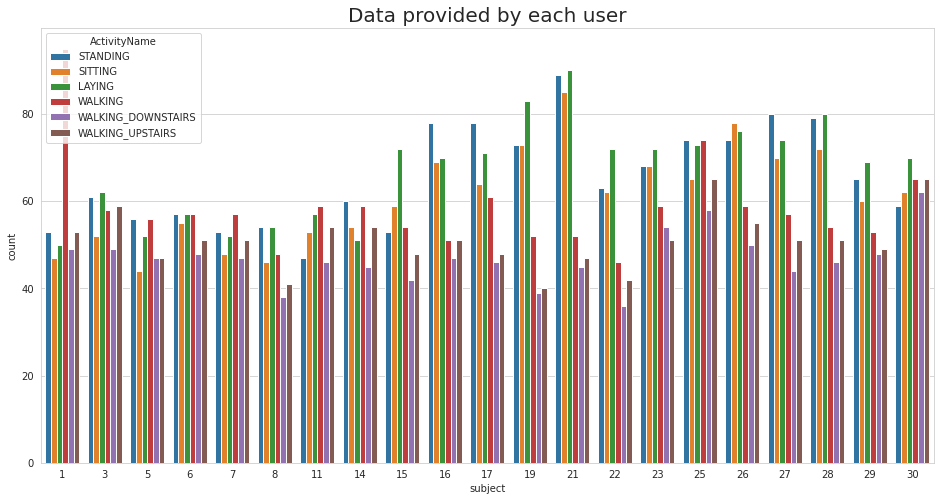

In [58]:
#width and height in inches
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

- Here, we trying to find out for each person, how many datapoints do i have for standing, sitting, laying, walking, walking upstairs, walking downstairs.
- After observation, i can state that for most people, we have descent amount of data.
- There is certainly a few difference , but isn't a huge difference.
- So we have got almost same number of reading from all the subjects.

In [63]:
import warnings
warnings.filterwarnings('ignore')

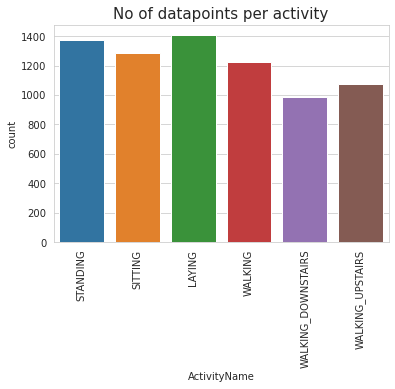

In [64]:
plt.title('No of datapoints per activity', fontsize = 15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

- Our data is almost well balanced

## 4. Changing feature names 

In [65]:
columns = train.columns

#Removing
columns = columns.str.replace('[()]', '')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]', '')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

 ## 5. Save this dataframe in a csv file

In [67]:
train.to_csv(r'C:\Users\sweta\OneDrive\Desktop\DL Projects\Human Activity Recognition\train.csv', index=False)
test.to_csv(r'C:\Users\sweta\OneDrive\Desktop\DL Projects\Human Activity Recognition\test.csv', index=False)

# EXPLORATORY DATA ANALYSIS

#### 1. Feature Engineering from Domain Knowledge

- Static and Dynamic Activities
    - Static Activities(sit, stand, lie down)
    - Dynamic Activities(walk, walk upstairs, walk downstairs)

#### 2. Stationary and moving activities are completely different

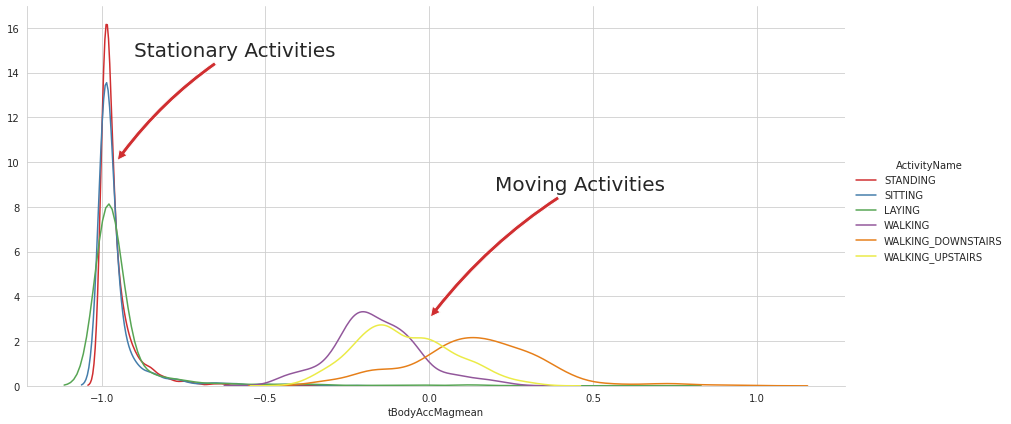

In [91]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6, aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean',hist=False)\
.add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,10), xytext=(-0.9,15), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

- In static activities (sit, stand, lie down) motion information will not be very useful.
- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.

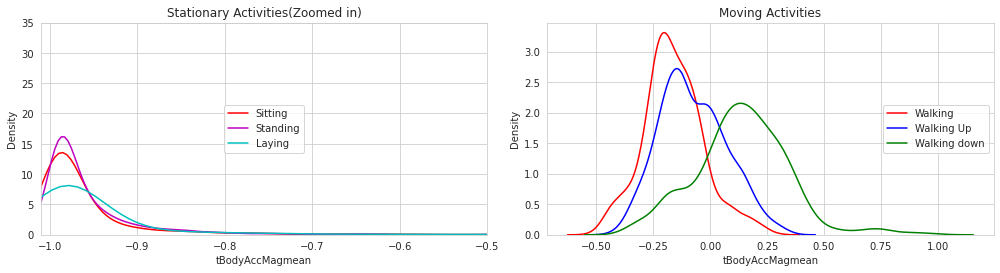

In [98]:
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')

#padding is done using tight_layout
plt.tight_layout()
plt.show()

#### 3. Magnitude of an acceleartion can separate well

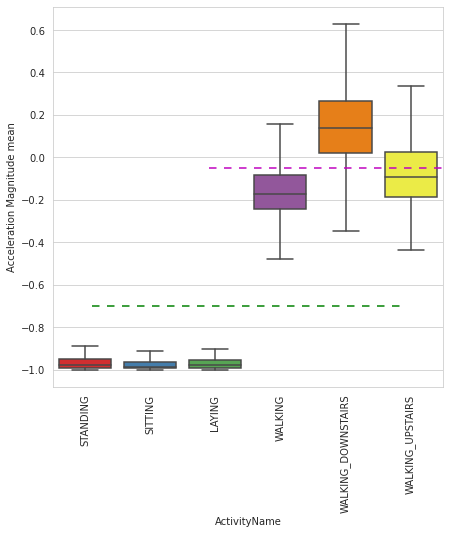

In [104]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName',y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

Observations
- If Acceleration magnitude mean is < -0.8, then the activities are either standing, sitting or laying.
- If Acceleration magnitude mean is > -0.6, then the activities are either walking,walking downstairs, walking upstairs.
- If Acceleration magnitude mean is > 0.0, the activity is walking downstairs.
- We can classify fairly well.

#### 4. Position of GravityAcceleration also matters

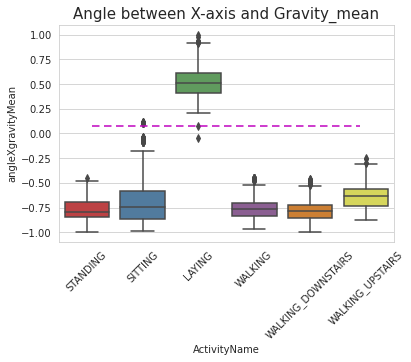

In [109]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 45)
plt.show()

Observations
- If angleX,gravityMean > 0, then Activity is Laying.
- We can classify all datapoints belonging to Laying activity with just a single if else statement.

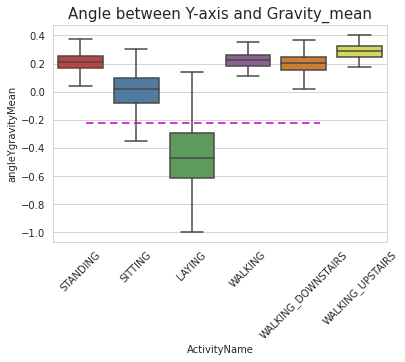

In [108]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 45)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# APPLYING t-sne ON DATA 

In [110]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# I will perform t-sne on the data
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
    for index,perplexity in enumerate(perplexities):
        #perform tsne
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
                # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.008s...
[t-SNE] Computed neighbors for 7352 samples in 1.220s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635854
[t-SNE] Computed conditional probabilities in 0.031s
[t-SNE] Iteration 50: error = 124.6414642, gradient norm = 0.0276956 (50 iterations in 2.189s)
[t-SNE] Iteration 100: error = 106.9841156, gradient norm = 0.0307748 (50 iterations in 1.230s)
[t-SNE] Iteration 150: error = 100.7822266, gradient norm =

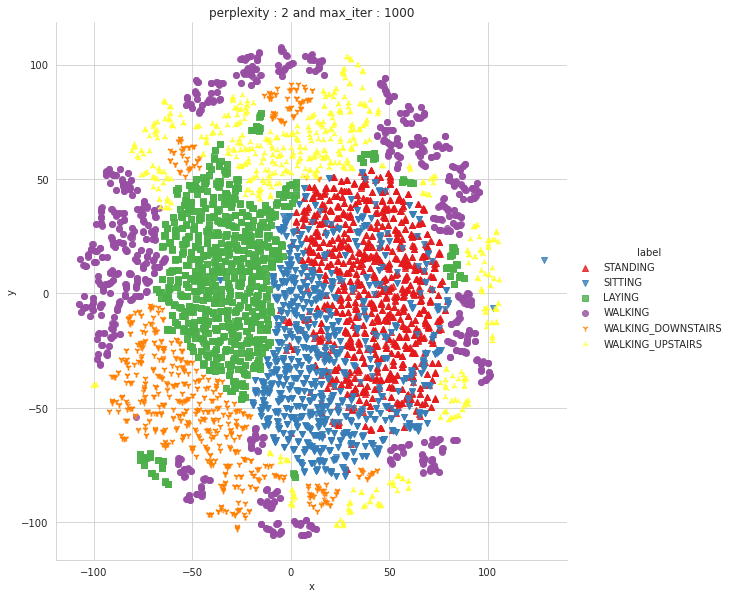

Done
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 1.416s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.050s
[t-SNE] Iteration 50: error = 114.0255661, gradient norm = 0.0229384 (50 iterations in 1.648s)
[t-SNE] Iteration 100: error = 97.5111771, gradient norm = 0.0169255 (50 iterations in 1.407s)
[t-SNE] Iteration 150: error = 93.3061600, gradient no

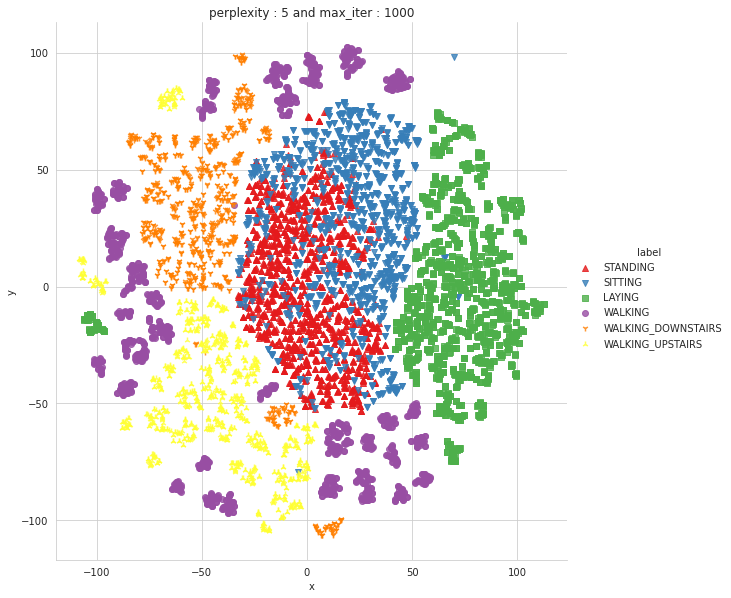

Done
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 1.167s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.076s
[t-SNE] Iteration 50: error = 105.6672440, gradient norm = 0.0222062 (50 iterations in 1.869s)
[t-SNE] Iteration 100: error = 90.3042145, gradient norm = 0.0106632 (50 iterations in 1.709s)
[t-SNE] Iteration 150: error = 87.3619385, gradient no

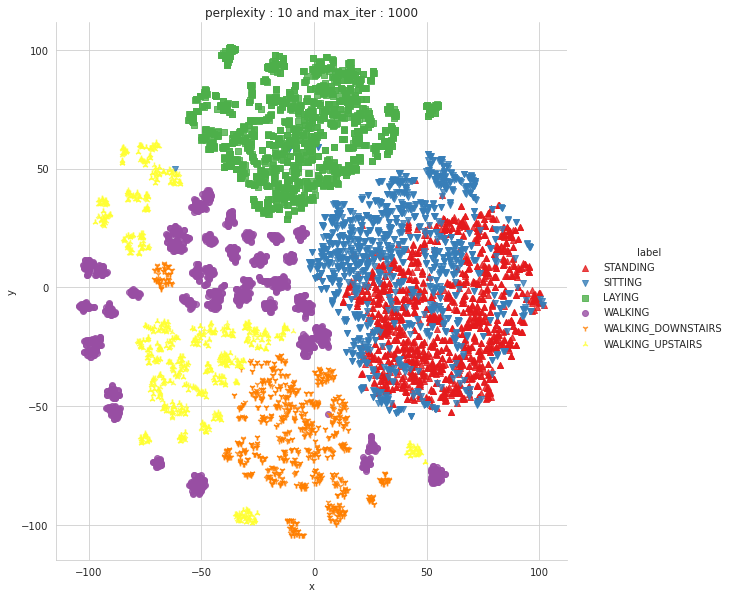

Done
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 1.163s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.151s
[t-SNE] Iteration 50: error = 97.3900299, gradient norm = 0.0195702 (50 iterations in 1.936s)
[t-SNE] Iteration 100: error = 85.1833344, gradient norm = 0.0076484 (50 iterations in 2.140s)
[t-SNE] Iteration 150: error = 82.7891846, gradient nor

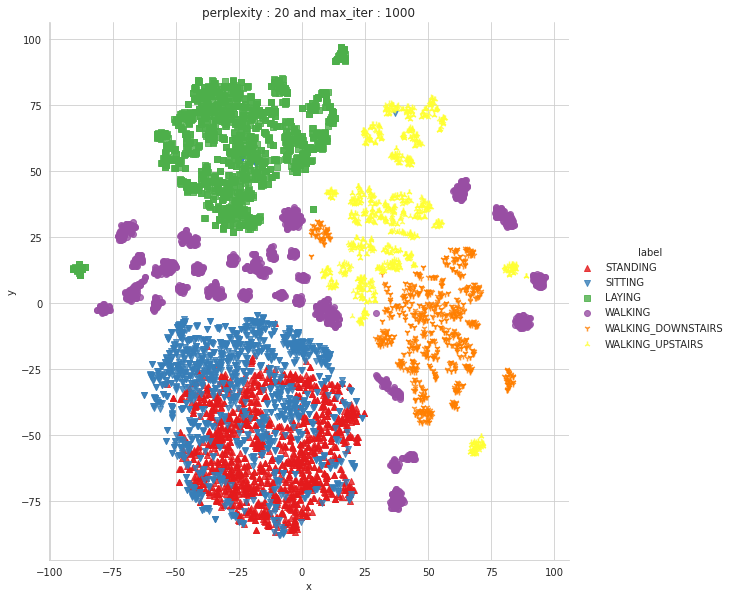

Done
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 1.478s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.476s
[t-SNE] Iteration 50: error = 85.8669434, gradient norm = 0.0279919 (50 iterations in 2.192s)
[t-SNE] Iteration 100: error = 75.5344391, gradient norm = 0.0041879 (50 iterations in 2.184s)
[t-SNE] Iteration 150: error = 74.6643982, gradient no

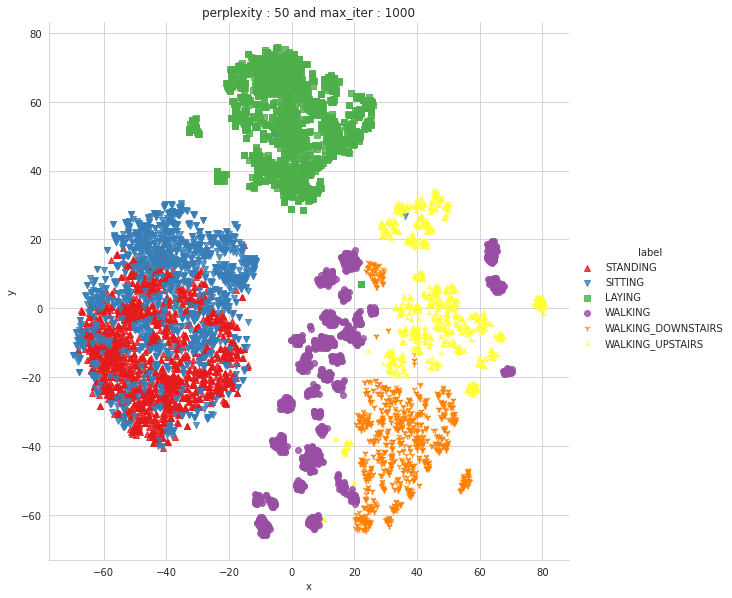

Done


In [114]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

#### Observations
- I mapped the 561 dimensional space into 2 dimensional space.

- For perplexity = 2, n_iter=1000 :
    - I noticed that, most points are well clustered together, except there is a little overlapping at a considerable region for standing and sitting classes.
    - Perhaps, separating standing and sitting classes can be challengible.
    
- So, i changed my perplexity to get more understanding that if the shape changes dramatically.

- For perplexity = 5, n_iter=1000 :
    - Things are still the same, there is still overlapping between sitting and standing.

- So, after observing t-sne plots for perplexities like 10,20,50, sitting and standing classes are still overlapping somehow. Except that everything else should be classified fairly well.